**Import Necessary Libraries**

In [19]:
import numpy 
import sklearn
from sklearn import preprocessing
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import joblib
from joblib import dump

**Read the dataset as a pandas Dataframe**

In [20]:
loan_data = pd.read_csv("D:/Advanced Machine Learining Project/Dataset/loan_approval_dataset.csv")
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Label Encoders to persorm One-Hot Encoding for categorical columns 

In [21]:
label_encoder = preprocessing.LabelEncoder()
loan_data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [22]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [23]:
label_encoder_y = preprocessing.LabelEncoder() 

In [24]:
loan_data[' education'] = label_encoder.fit_transform(loan_data[' education'])
loan_data[' self_employed'] = label_encoder.fit_transform(loan_data[' self_employed'])
loan_data[' loan_status'] = label_encoder_y.fit_transform(loan_data[' loan_status'])
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


**Convert dataframe to Numpy**

In [25]:
np_loan = loan_data.to_numpy()
X_data = np_loan[:,1:12]
Y_data=np_loan[:,12]

#Scale the data to ease the computation and prevent loss
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
Y_data = tf.keras.utils.to_categorical(Y_data,num_classes = 2)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

**Train Test split**

In [26]:
#Splitting data into train and test with a ratio of 80:20 
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,train_size = 0.8)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(3415, 11) (3415, 2) (854, 11) (854, 2)


In [27]:
#Defining the model, you can add or delete layers here and change the parameters to understand how it affects accuracy.

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(512,input_shape = (11,),name = "Hidden_layer_1",activation="relu"))
model.add(keras.layers.Dense(512,name = "Hidden_layer_2",activation="relu"))
#model.add(keras.layers.Dense(16,name = "Hidden_layer_3",activation="relu"))
model.add(keras.layers.Dense(128,name = "Hidden_layer_4",activation="relu"))
model.add(keras.layers.Dense(2,name = "Output_layer",activation="softmax"))
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_layer_1 (Dense)          │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_4 (Dense)          │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,722 (1.28 MB)

 Trainable params: 334,722 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Defining arguements for training the model  

In [28]:
verbose = 1
batch_size = 8
epochs = 30
validation_split = 0.1

**Training the model**

In [29]:
history=model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=verbose,
          validation_split=validation_split)

Epoch 1/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8884 - loss: 0.2914 - val_accuracy: 0.9561 - val_loss: 0.1983
Epoch 2/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9322 - loss: 0.1731 - val_accuracy: 0.9561 - val_loss: 0.1809
Epoch 3/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9417 - loss: 0.1624 - val_accuracy: 0.9649 - val_loss: 0.1303
Epoch 4/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1141 - val_accuracy: 0.9591 - val_loss: 0.1471
Epoch 5/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9595 - loss: 0.1036 - val_accuracy: 0.9649 - val_loss: 0.1211
Epoch 6/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1136 - val_accuracy: 0.9649 - val_loss: 0.1417
Epoch 7/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9617 - loss: 0.1009 - val_accuracy: 0.9561 - val_loss: 0.1671
Epoch 8/30
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.0936 - val_accuracy: 0.

Observing the training curve 

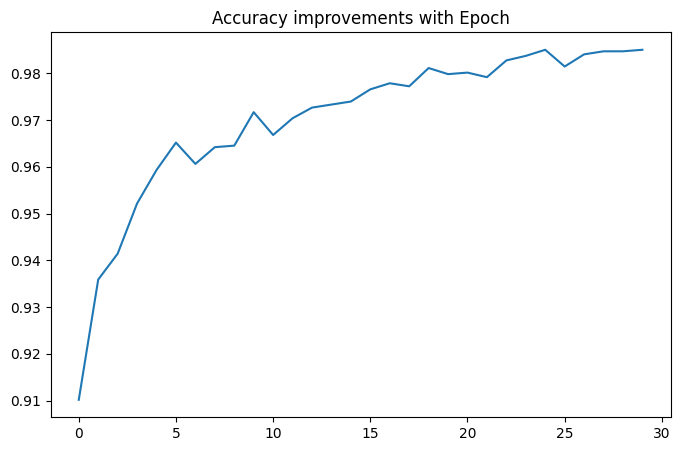


Evaluation against Test Dataset :

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9638 - loss: 0.2615


[0.25896772742271423, 0.9601873755455017]

In [30]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n")
model.evaluate(X_test,Y_test)

**Saving the model for further use**

In [31]:
#model.save("loan_seq")
model.export("loan_seq")
model.save("loan_seq.h5")
dump(model, "ANN.joblib")

INFO:tensorflow:Assets written to: loan_seq\assets


INFO:tensorflow:Assets written to: loan_seq\assets


Saved artifact at 'loan_seq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  1690877522576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1690877521808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1690877522384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1690879557712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1690877521232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1690879559056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1690879561552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1690879560208: TensorSpec(shape=(), dtype=tf.resource, name=None)


['ANN.joblib']

In [32]:
prediction_input = [[0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)
prediction = model.predict(scaled_input)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[9.6257818e-06 9.9999034e-01]]


**Evaluating accuracy against test data**

In [33]:
pred = np.argmax(prediction)
print("Prediction is ", label_encoder_y.inverse_transform([pred]))

Prediction is  [' Rejected']


In [34]:
prediction_input = [[5,1,1,8000000,27200000,6,348,6400000,300000,16700000,7100000]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)
prediction = model.predict(scaled_input)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[8.734827e-08 9.999999e-01]]


In [35]:
pred = np.argmax(prediction)
print("Prediction is ", label_encoder_y.inverse_transform([pred]))

Prediction is  [' Rejected']


In [36]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
